In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Task 1

In [2]:
a = 5
b = 5

In [3]:
np.random.seed(50)
size = 500

noise = np.random.normal(0, 1, size)

x = np.random.uniform(0, 1, size)
y = a + b * x +  noise

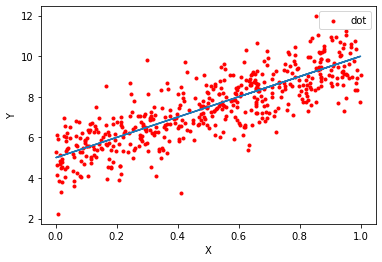

In [4]:
plt.scatter(x, y, color = 'red', marker = '.', label = 'dot')
plt.plot(x, a * x + b)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Gradient Descent

In [5]:
a_current = random.randint(0, 100)
b_current = random.randint(0, 100)
lr = 0.01
iter_amount = 10000

for i in range(iter_amount):
    y_new = a_current + b_current * x
    loss = y - y_new
    a_new = -2 * loss.mean()
    b_new = -2 * (x * loss).mean()
    a_current = a_current - lr * a_new
    b_current = b_current - lr * b_new

In [6]:
print("Selected parameters:", 'a =', a_current, ',', 'b =', b_current)
print("Initial parameters for generating:", 'a =', a, ',', 'b =', b)
print("The parameters received:", 'a =', a_current, ',', 'b =', b_current)

Selected parameters: a = 4.999193371056187 , b = 4.841946121735204
Initial parameters for generating: a = 5 , b = 5
The parameters received: a = 4.999193371056187 , b = 4.841946121735204


In [7]:
epsilon = 0.2
if abs(a_current - a) < epsilon and abs(b_current - b) < epsilon:
    print("Actual result === Expected result")
else:
    print("Error")

Actual result === Expected result


# Task 2

In [8]:
np.random.seed(50)
size = 100

In [9]:
mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, size)

In [10]:
mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, size)

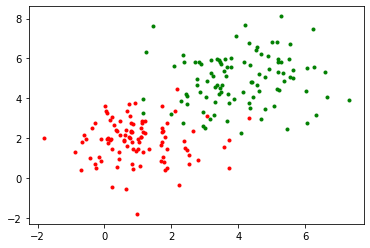

In [11]:
plt.scatter(x_1[:, 0], x_1[:, 1], marker = '.', color = 'red')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = '.', color = 'green')

In [12]:
X = np.concatenate([x_1, x_2])
Y = np.array([0] * size + [1] *  size)

In [13]:
#random.shuffle(Y)
X_train, X_test = X[:150,:], X[50:,:]
Y_train, Y_test = Y[:150], Y[50:]

## Logistic Regression

In [14]:
class LogisticRegression:
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit( self, X, Y ) :
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range( self.iterations ) :
            A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
            tmp = ( A - self.Y.T )
            tmp = np.reshape( tmp, self.m )
            dW = np.dot( self.X.T, tmp ) / self.m
            db = np.sum( tmp ) / self.m
            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db
        return self
    def predict( self, X ) :
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
        Y = np.where( Z > 0.5, 1, 0 )
        return Y

In [15]:
lr = 0.01 
iter_amount = 10000
model = LogisticRegression( lr, iter_amount )
model.fit( X_train, Y_train )

In [16]:
Y_pred = model.predict( X_test )

In [17]:
correctly_classified = 0
count = 0
for count in range( np.size( Y_pred ) ) :
    if Y_test[count] == Y_pred[count] :
        correctly_classified = correctly_classified + 1
    count = count + 1

In [18]:
print( "Accuracy:", (correctly_classified / count ) * 100 )

Accuracy: 95.33333333333334
